In [2]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

chinese_text = "大型语言模型（LLM）在自然语言处理领域取得了显著进展。它们能够理解、生成和处理人类语言，并在各种任务中表现出色，例如文本摘要、机器翻译和问答系统。LLM 的发展离不开海量数据的训练和复杂的神经网络架构。\n\n然而，LLM 也面临一些挑战，包括计算资源消耗大、对训练数据偏差的敏感性以及在处理长文本时的上下文限制。为了解决这些问题，研究人员正在探索新的模型架构、训练方法和应用策略，以期进一步提升 LLM 的性能和泛化能力。"

recursive_splitter_chinese = RecursiveCharacterTextSplitter(
    chunk_size=50,
    chunk_overlap=10,
    length_function=len,
    separators=["\n\n", "。", "，", " ", ""]#中文的分隔符，可以用逗号句号
)

chinese_chunks = recursive_splitter_chinese.split_text(chinese_text)
for i, chunk in enumerate(chinese_chunks):
    print(f"Chunk {i+1}:\n{chunk}\n---")


Chunk 1:
大型语言模型（LLM）在自然语言处理领域取得了显著进展
---
Chunk 2:
。它们能够理解、生成和处理人类语言，并在各种任务中表现出色，例如文本摘要、机器翻译和问答系统
---
Chunk 3:
。LLM 的发展离不开海量数据的训练和复杂的神经网络架构。
---
Chunk 4:
然而，LLM 也面临一些挑战
---
Chunk 5:
，包括计算资源消耗大、对训练数据偏差的敏感性以及在处理长文本时的上下文限制
---
Chunk 6:
。为了解决这些问题，研究人员正在探索新的模型架构、训练方法和应用策略
---
Chunk 7:
，以期进一步提升 LLM 的性能和泛化能力
---
Chunk 8:
。
---


语义分块

#### 我们需要将文本进行拆分，拆分成多个单句，可以按照标点符号进行切分

split_char = ['.', '?', '!']

In [3]:
import re

with open('dream.txt', 'r', encoding='utf-8') as f:
    essay = f.read()

single_sentences_list = re.split(r'(?<=[。！？])', essay)
# 移除可能存在的空字符串
single_sentences_list = [s.strip() for s in single_sentences_list if s.strip()]

for sentence in single_sentences_list:
    print(sentence)

print(f'{len(single_sentences_list)} sentences were found')


那座山正当顶上，有一块仙石。
其石有三丈六尺五寸高，有二丈四尺围圆。
三丈六尺五寸高，按周天三百六十五度；二丈四尺围圆，按政历二十四气。
上有九窍八孔，按九宫八卦。
四面更无树木遮阴，左右倒有芝兰相衬。
盖自开辟以来，每受天真地秀，日精月华，感之既久，遂有灵通之意。
内育仙胞，一日迸裂，产一石卵，似圆球样大。
因见风，化作一个石猴，五官俱备，四肢皆全。
便就学爬学走，拜了四方。
目运两道金光，射冲斗府。
（群猴顺涧爬山，直至源流之处，乃是一股瀑布飞泉。
众猴拍手称扬道：“好水！
好水！
原来此处远通山脚之下，直接大海之波。
”又道：“那一个有本事的，钻进去寻个源头出来，不伤身体者，我等即拜他为王。
”连呼了三声，忽见丛杂中跳出一个石猴，应声高叫道：“我进去！
我进去！
”好猴！
也是他——
今日芳名显，时来大运通。
有缘居此地，天遣入仙宫。
你看他瞑目蹲身，将身一纵，径跳入瀑布泉中，忽睁睛抬头观看，那里边却无水无波，明明朗朗的一架桥梁。
他住了身，定了神，仔细再看，原来是座铁板桥。
桥下之水，冲贯于石窍之间，倒挂流出去，遮闭了桥门。
却又欠身上桥头，再走再看，却似有人家住处一般，真个好所在。
众猴听得，个个欢喜。
都道：“你还先走，带我们进去，进去！
”石猴却又瞑目蹲身，往里一跳，叫道：“都随我进来！
进来！
”那些猴有胆大的，都跳进去了；胆小的，一个个伸头缩颈，抓耳挠腮，大声叫喊，缠一会，也都进去了。
跳过桥头，一个个抢盆夺碗，占灶争床，搬过来，移过去，正是猴性顽劣，再无一个宁时，只搬得力倦神疲方止。
石猴端坐上面道：“列位呵，‘人而无信，不知其可。
’你们才说有本事进得来，出得去，不伤身体者，就拜他为王。
我如今进来又出去，出去又进来，寻了这一个洞天与列位安眠稳睡，各享成家之福，何不拜我为王？
”众猴听说，即拱伏无违。
一个个序齿排班，朝上礼拜，都称“千岁大王”。
自此，石猴高登王位，将“石”字儿隐了，遂称美猴王。
36 sentences were found


我们需要为单个句子拼接更多的句子，但是 `list` 添加比较困难。因此将其转换为字典列表（`List[dict]`）

{ 'sentence' : XXX  , 'index' : 0}

In [4]:
sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(single_sentences_list)]
sentences[:3]

[{'sentence': '那座山正当顶上，有一块仙石。', 'index': 0},
 {'sentence': '其石有三丈六尺五寸高，有二丈四尺围圆。', 'index': 1},
 {'sentence': '三丈六尺五寸高，按周天三百六十五度；二丈四尺围圆，按政历二十四气。', 'index': 2}]

In [5]:
#利用滑动窗口分段
def combine_sentences(sentences, buffer_size=1):
    combined_sentences = [
        ' '.join(sentences[j]['sentence'] for j in range(max(i - buffer_size, 0), min(i + buffer_size + 1, len(sentences))))
        for i in range(len(sentences))
    ]   
    # 更新原始字典列表，添加组合后的句子
    for i, combined_sentence in enumerate(combined_sentences):
        sentences[i]['combined_sentence'] = combined_sentence

    return sentences

In [6]:
sentences = combine_sentences(sentences)

In [7]:
sentences[:6]

[{'sentence': '那座山正当顶上，有一块仙石。',
  'index': 0,
  'combined_sentence': '那座山正当顶上，有一块仙石。 其石有三丈六尺五寸高，有二丈四尺围圆。'},
 {'sentence': '其石有三丈六尺五寸高，有二丈四尺围圆。',
  'index': 1,
  'combined_sentence': '那座山正当顶上，有一块仙石。 其石有三丈六尺五寸高，有二丈四尺围圆。 三丈六尺五寸高，按周天三百六十五度；二丈四尺围圆，按政历二十四气。'},
 {'sentence': '三丈六尺五寸高，按周天三百六十五度；二丈四尺围圆，按政历二十四气。',
  'index': 2,
  'combined_sentence': '其石有三丈六尺五寸高，有二丈四尺围圆。 三丈六尺五寸高，按周天三百六十五度；二丈四尺围圆，按政历二十四气。 上有九窍八孔，按九宫八卦。'},
 {'sentence': '上有九窍八孔，按九宫八卦。',
  'index': 3,
  'combined_sentence': '三丈六尺五寸高，按周天三百六十五度；二丈四尺围圆，按政历二十四气。 上有九窍八孔，按九宫八卦。 四面更无树木遮阴，左右倒有芝兰相衬。'},
 {'sentence': '四面更无树木遮阴，左右倒有芝兰相衬。',
  'index': 4,
  'combined_sentence': '上有九窍八孔，按九宫八卦。 四面更无树木遮阴，左右倒有芝兰相衬。 盖自开辟以来，每受天真地秀，日精月华，感之既久，遂有灵通之意。'},
 {'sentence': '盖自开辟以来，每受天真地秀，日精月华，感之既久，遂有灵通之意。',
  'index': 5,
  'combined_sentence': '四面更无树木遮阴，左右倒有芝兰相衬。 盖自开辟以来，每受天真地秀，日精月华，感之既久，遂有灵通之意。 内育仙胞，一日迸裂，产一石卵，似圆球样大。'}]

接下来使用**embedding model**对**sentences** 进行编码

In [8]:
import os
from langchain_community.embeddings import DashScopeEmbeddings
from openai import api_key


embeddings_model = DashScopeEmbeddings(
        model="text-embedding-v2",
        dashscope_api_key="sk-ba2dda3817f145d7af141fdf32e31d90",

    )

    # 提取所有组合后的句子用于 embedding
combined_sentences_to_embed = [x['combined_sentence'] for x in sentences]

# 对句子进行 embedding
try:
    embeddings = embeddings_model.embed_documents(combined_sentences_to_embed)
    print(f"成功对 {len(embeddings)} 个句子进行了 embedding。")
    # print(f"第一个句子的 embedding 维度: {len(embeddings[0])}")
except Exception as e:
    print(f"Embedding 时发生错误: {e}")

成功对 36 个句子进行了 embedding。


将embedding添加到sentence中

In [9]:
for i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[i]

In [10]:
sentences[0]

{'sentence': '那座山正当顶上，有一块仙石。',
 'index': 0,
 'combined_sentence': '那座山正当顶上，有一块仙石。 其石有三丈六尺五寸高，有二丈四尺围圆。',
 'combined_sentence_embedding': [-0.00013822938489499478,
  0.018786592346616685,
  0.0451302772078046,
  -0.02761735213892464,
  0.021111035128486208,
  -0.0017738470315979173,
  -0.02054849874748582,
  -0.0009048344618921313,
  -0.017916253040163258,
  0.0015191135760505724,
  0.006177286297023113,
  0.02846646365741579,
  -0.029952408814775303,
  -0.04381415435414332,
  0.008347827616166115,
  0.03721231229787463,
  0.011823877894989258,
  0.0020710360630698194,
  -0.012619919943574712,
  0.007838360705071424,
  0.019296059257711374,
  0.023944944821450417,
  0.04345328195878458,
  -0.0034627829113467196,
  -0.005444927612324497,
  0.06338617485536432,
  0.004362310426248281,
  -0.009971753395280438,
  0.0054343137183433575,
  0.016462149564747165,
  -0.0675892768718955,
  -0.013861745539368017,
  -0.013277981370405352,
  -0.027298935319490458,
  0.0009970426658532795,
  0.0116965

接下来需要根据余弦相似度进行切分
通过计算两个向量的夹角余弦值来衡量相似性

In [11]:
import numpy as np
def cosine_similarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

In [12]:
#计算emed1和emed2的余弦相似度
cosine_similarity(sentences[0]['combined_sentence_embedding'], sentences[1]['combined_sentence_embedding'])

np.float64(0.9481703067773679)

In [ ]:
#遍历，计算余弦相似度
def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']
        # Calculate cosine similarity
        similarity = cosine_similarity(embedding_current, embedding_next)
        # Convert to cosine distance
        distance = 1 - similarity
        distances.append(distance)
        # Store distance in the dictionary
        sentences[i]['distance_to_next'] = distance
    return distances, sentences

In [14]:
distances, sentences = calculate_cosine_distances(sentences)

In [19]:
sentences[0]['distance_to_next']

np.float64(0.05182969322263209)

In [21]:
sentences[0]

{'sentence': '那座山正当顶上，有一块仙石。',
 'index': 0,
 'combined_sentence': '那座山正当顶上，有一块仙石。 其石有三丈六尺五寸高，有二丈四尺围圆。',
 'combined_sentence_embedding': [-0.00013822938489499478,
  0.018786592346616685,
  0.0451302772078046,
  -0.02761735213892464,
  0.021111035128486208,
  -0.0017738470315979173,
  -0.02054849874748582,
  -0.0009048344618921313,
  -0.017916253040163258,
  0.0015191135760505724,
  0.006177286297023113,
  0.02846646365741579,
  -0.029952408814775303,
  -0.04381415435414332,
  0.008347827616166115,
  0.03721231229787463,
  0.011823877894989258,
  0.0020710360630698194,
  -0.012619919943574712,
  0.007838360705071424,
  0.019296059257711374,
  0.023944944821450417,
  0.04345328195878458,
  -0.0034627829113467196,
  -0.005444927612324497,
  0.06338617485536432,
  0.004362310426248281,
  -0.009971753395280438,
  0.0054343137183433575,
  0.016462149564747165,
  -0.0675892768718955,
  -0.013861745539368017,
  -0.013277981370405352,
  -0.027298935319490458,
  0.0009970426658532795,
  0.0116965

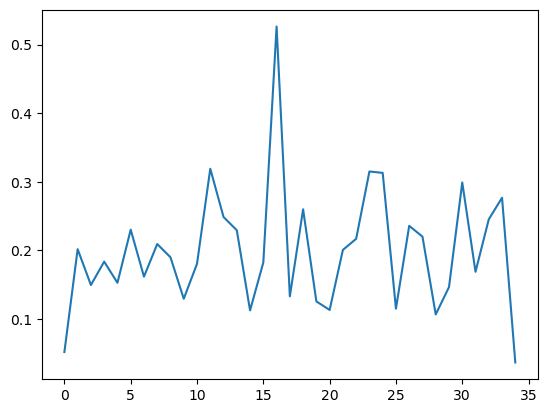

In [16]:
import matplotlib.pyplot as plt

plt.plot(distances);

距离的第95个百分位阈值是: 0.3162183593326639


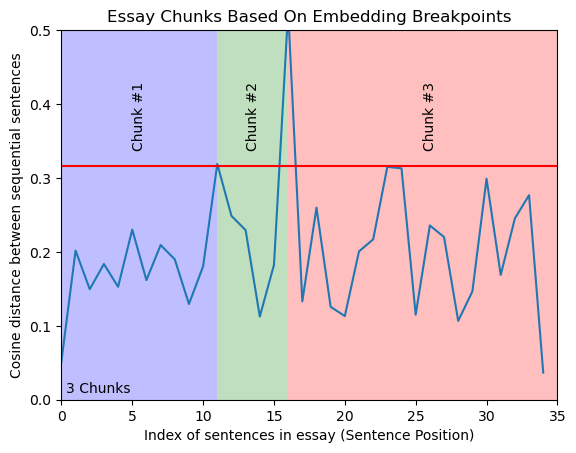

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 'distances' 是一个预先计算好的列表，包含了相邻句子嵌入之间的余弦距离
# 例如: distances = [0.1, 0.5, 0.2, 0.8, 0.3, ...]

# 使用 matplotlib 绘制距离折线图，X 轴是句子索引，Y 轴是余弦距离
plt.plot(distances)

# 设置 Y 轴的显示上限，以便更清晰地观察距离变化
y_upper_bound = 0.5
plt.ylim(0, y_upper_bound)
# 设置 X 轴的范围，使其与句子数量匹配
plt.xlim(0, len(distances))


# --- 计算并可视化切分阈值 ---

# 我们需要一个距离阈值来判断哪里是“异常”大的间隔，从而进行切分
# 这里使用 numpy 的 percentile 函数，取第 95 个百分位数作为阈值
# 这意味着 95% 的句子间距离都小于这个值，超过它的就是我们关心的“断点”
breakpoint_percentile_threshold = 95
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold)
print("距离的第95个百分位阈值是:", breakpoint_distance_threshold)
# 在图上画一条红色的水平线，代表切分阈值，方便观察
plt.axhline(y=breakpoint_distance_threshold, color='r', linestyle='-')

# 计算将要生成的文本块数量（断点数量 + 1）
num_distances_above_theshold = len([x for x in distances if x > breakpoint_distance_threshold])
# 在图表的左上角显示最终的文本块数量
plt.text(x=(len(distances)*.01), y=y_upper_bound/50, s=f"{num_distances_above_theshold + 1} Chunks")

# --- 标记和高亮显示文本块 ---

# 找到所有距离大于阈值的点的索引，这些索引就是我们的切分点
indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold]

# 定义一组颜色，用于循环标记不同的文本块区域
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# 遍历所有切分点索引，以在图上用垂直区域（axvspan）高亮显示每个文本块
for i, breakpoint_index in enumerate(indices_above_thresh):
    # 确定当前块的起始索引。如果是第一个块，则从0开始；否则，从上一个断点开始。
    start_index = 0 if i == 0 else indices_above_thresh[i - 1]
    # 确定当前块的结束索引
    end_index = breakpoint_index

    # 使用 axvspan 在图上绘制一个带颜色的半透明垂直矩形区域，代表一个文本块
    plt.axvspan(start_index, end_index, facecolor=colors[i % len(colors)], alpha=0.25)
    # 在每个高亮区域的中央添加文本标签（例如 “Chunk #1”）
    plt.text(x=np.average([start_index, end_index]),
            y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
            s=f"Chunk #{i+1}", horizontalalignment='center',
            rotation='vertical')

# 单独处理最后一个文本块（从最后一个切分点到文本末尾）
if indices_above_thresh:
    last_breakpoint = indices_above_thresh[-1]
    if last_breakpoint < len(distances):
        # 为最后一个文本块绘制高亮区域
        plt.axvspan(last_breakpoint, len(distances), facecolor=colors[len(indices_above_thresh) % len(colors)], alpha=0.25)
        # 为最后一个文本块添加标签
        plt.text(x=np.average([last_breakpoint, len(distances)]),
                 y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
                 s=f"Chunk #{len(indices_above_thresh) + 1}",
                 rotation='vertical')

# --- 设置图表标题和坐标轴标签 ---
plt.title("Essay Chunks Based On Embedding Breakpoints")
plt.xlabel("Index of sentences in essay (Sentence Position)")
plt.ylabel("Cosine distance between sequential sentences")

# 显示最终的图表
plt.show()

In [30]:
# --- 基于语义分割点将句子重新组合成文本块 ---

# 初始化块的起始句子索引。我们将根据之前计算出的语义分割点（`indices_above_thresh`）来切分句子列表。
start_index = 0

# 创建一个列表，用于存储最终组合成的、具有语义连贯性的文本块。
chunks = []

# 遍历所有识别出的语义分割点（这些是句子列表 `sentences` 中的索引）。
for index in indices_above_thresh:
    # 确定当前文本块的结束点，即当前的分割点索引。
    end_index = index

    # 从原始句子列表（`sentences`）中切片，提取从上一个分割点到当前分割点之间的所有句子。
    # `end_index + 1` 是为了在切片时包含结束索引指向的那个句子。
    group = sentences[start_index:end_index + 1]
    
    # 将切分出的句子组（`group`）中的所有 'sentence' 字段的值合并成一个单独的字符串，句子之间用空格隔开。
    combined_text = ' '.join([d['sentence'] for d in group])
    
    # 将合并后的文本块添加到 `chunks` 列表中。
    chunks.append(combined_text)
    
    # 更新下一个文本块的起始索引，设置为当前分割点的下一个位置，为处理下一个块做准备。
    start_index = index + 1

# 处理最后一个文本块。
# 循环结束后，如果 `start_index` 仍然小于句子总数，说明从最后一个分割点到文本末尾还有剩余的句子。
if start_index < len(sentences):
    # 将这些剩余的句子合并成最后一个文本块。
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)

# 此时，`chunks` 列表包含了所有根据语义距离切分和重组后的文本块。

In [31]:
for i, chunk in enumerate(chunks):
    buffer = 200
    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")

Chunk #0
那座山正当顶上，有一块仙石。 其石有三丈六尺五寸高，有二丈四尺围圆。 三丈六尺五寸高，按周天三百六十五度；二丈四尺围圆，按政历二十四气。 上有九窍八孔，按九宫八卦。 四面更无树木遮阴，左右倒有芝兰相衬。 盖自开辟以来，每受天真地秀，日精月华，感之既久，遂有灵通之意。 内育仙胞，一日迸裂，产一石卵，似圆球样大。 因见风，化作一个石猴，五官俱备，四肢皆全。 便就学爬学走，拜了四方。 目运两道金光，射冲
...
高，按周天三百六十五度；二丈四尺围圆，按政历二十四气。 上有九窍八孔，按九宫八卦。 四面更无树木遮阴，左右倒有芝兰相衬。 盖自开辟以来，每受天真地秀，日精月华，感之既久，遂有灵通之意。 内育仙胞，一日迸裂，产一石卵，似圆球样大。 因见风，化作一个石猴，五官俱备，四肢皆全。 便就学爬学走，拜了四方。 目运两道金光，射冲斗府。 （群猴顺涧爬山，直至源流之处，乃是一股瀑布飞泉。 众猴拍手称扬道：“好水！


Chunk #1
好水！ 原来此处远通山脚之下，直接大海之波。 ”又道：“那一个有本事的，钻进去寻个源头出来，不伤身体者，我等即拜他为王。 ”连呼了三声，忽见丛杂中跳出一个石猴，应声高叫道：“我进去！ 我进去！
...
好水！ 原来此处远通山脚之下，直接大海之波。 ”又道：“那一个有本事的，钻进去寻个源头出来，不伤身体者，我等即拜他为王。 ”连呼了三声，忽见丛杂中跳出一个石猴，应声高叫道：“我进去！ 我进去！


Chunk #2
”好猴！ 也是他——
今日芳名显，时来大运通。 有缘居此地，天遣入仙宫。 你看他瞑目蹲身，将身一纵，径跳入瀑布泉中，忽睁睛抬头观看，那里边却无水无波，明明朗朗的一架桥梁。 他住了身，定了神，仔细再看，原来是座铁板桥。 桥下之水，冲贯于石窍之间，倒挂流出去，遮闭了桥门。 却又欠身上桥头，再走再看，却似有人家住处一般，真个好所在。 众猴听得，个个欢喜。 都道：“你还先走，带我们进去，进去！ ”石猴却又
...
碗，占灶争床，搬过来，移过去，正是猴性顽劣，再无一个宁时，只搬得力倦神疲方止。 石猴端坐上面道：“列位呵，‘人而无信，不知其可。 ’你们才说有本事进得来，出得去，不伤身体者，就拜他为王。 我如今进来又出去，出去又进来，寻了这一个洞天与列位安眠稳睡，各享成家之福，何不拜我为王？ ”众猴听说，即拱伏无违。 一个个序齿排班，